## Data Preparation Phase

In [29]:
pip install tsplib95

In [32]:
!git clone https://github.com/Perkzi/TSP_funsearch.git

import sys

sys.path.append('/content/TSP_funsearch/')
print(sys.path)

Cloning into 'TSP_funsearch'...
remote: Enumerating objects: 258, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 258 (delta 39), reused 0 (delta 0), pack-reused 195 (from 1)
Receiving objects: 100% (258/258), 75.98 MiB | 22.45 MiB/s, done.
Resolving deltas: 100% (81/81), done.
['/content', '/env/python', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/usr/local/lib/python3.11/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.11/dist-packages/IPython/extensions', '/root/.ipython', '/content/TSP_funsearch/', '/content/TSP_funsearch/', '/content/TSP_funsearch/', '/content/TSP_funsearch/', '/content/TSP_funsearch/', '/content/TSP_funsearch/', '/content/TSP_funsearch/', '/content/TSP_funsearch/', '/content/TSP_funsearch/']


In [31]:
import shutil

folder_path = "/content/TSP_funsearch"
shutil.rmtree(folder_path)  # 删除整个文件夹及其所有内容

In [33]:
import TSP_DataLoading

Decompressed: d18512.tsp.gz → d18512.tsp
Decompressed: att48.tsp.gz → att48.tsp
Decompressed: st70.tsp.gz → st70.tsp
Decompressed: rd100.tsp.gz → rd100.tsp
Decompressed: pla33810.tsp.gz → pla33810.tsp
Decompressed: pr107.tsp.gz → pr107.tsp
Decompressed: gr17.tsp.gz → gr17.tsp
Decompressed: rl1323.tsp.gz → rl1323.tsp
Decompressed: ulysses22.tsp.gz → ulysses22.tsp
Decompressed: bays29.tsp.gz → bays29.tsp
Decompressed: si1032.tsp.gz → si1032.tsp
Decompressed: pr439.tsp.gz → pr439.tsp
Decompressed: u159.tsp.gz → u159.tsp
Decompressed: rl1304.tsp.gz → rl1304.tsp
Decompressed: u1060.tsp.gz → u1060.tsp
Decompressed: pcb442.tsp.gz → pcb442.tsp
Decompressed: pr152.tsp.gz → pr152.tsp
Decompressed: eil101.tsp.gz → eil101.tsp
Decompressed: pr226.tsp.gz → pr226.tsp
Decompressed: kroB200.tsp.gz → kroB200.tsp
Decompressed: pla85900.tsp.gz → pla85900.tsp
Decompressed: pcb1173.tsp.gz → pcb1173.tsp
Decompressed: u2319.tsp.gz → u2319.tsp
Decompressed: brd14051.tsp.gz → brd14051.tsp
Decompressed: gr96.tsp

In [21]:
import tarfile

with tarfile.open("/content/ALL_tsp.tar.gz", "r:gz") as tar:
    tar.extractall("tsplib_instances")
import gzip
import shutil
import os

def decompress_gz_files(folder="/content/tsplib_instances"):
    for fname in os.listdir(folder):
        if fname.endswith(".tsp.gz"):
            gz_path = os.path.join(folder, fname)
            tsp_path = os.path.join(folder, fname[:-3])  # remove .gz
            if not os.path.exists(tsp_path):
                with gzip.open(gz_path, 'rb') as f_in:
                    with open(tsp_path, 'wb') as f_out:
                        shutil.copyfileobj(f_in, f_out)
                print(f"Decompressed: {fname} → {fname[:-3]}")

decompress_gz_files("/content/tsplib_instances")


In [34]:
instances_AlgorithmDevelop = TSP_DataLoading.build_funsearch_dataset(TSP_DataLoading.tsplib_data1)
instances_PerformanceTesting = TSP_DataLoading.build_funsearch_dataset(TSP_DataLoading.tsplib_data2)
instances_GeneralizationTesting = TSP_DataLoading.build_funsearch_dataset(TSP_DataLoading.tsplib_data3)

# 下面不用看，上面就是文件调用，后续应该是从三个里调合适的测试用例进input

In [ ]:
import os
import numpy as np
import tsplib95
import matplotlib.pyplot as plt
import pandas as pd

### Basic Algorithm

   Instance  Nearest Insertion  Cheapest Insertion  Farthest Insertion
0  berlin52            9004.92             9050.69             8120.63
1     eil76             619.78              618.46              583.04


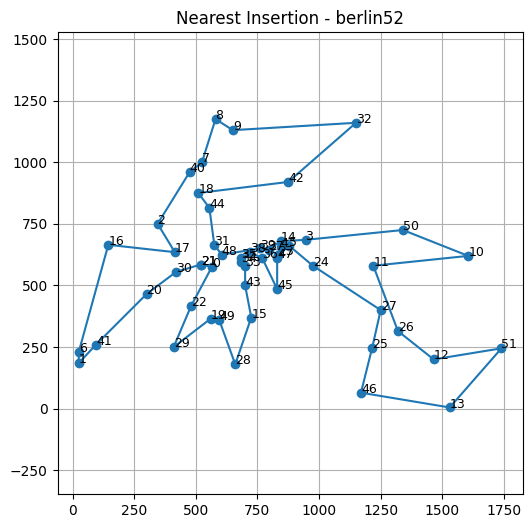

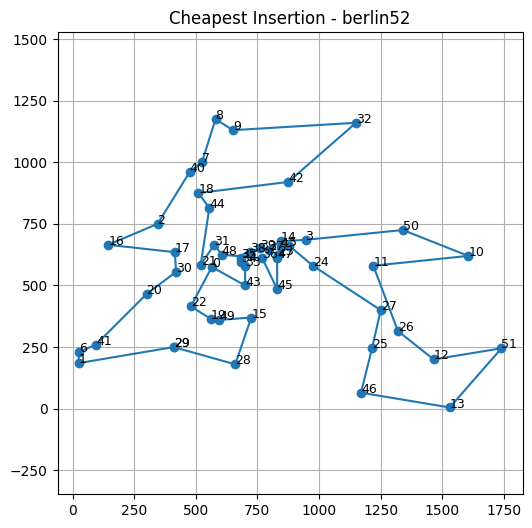

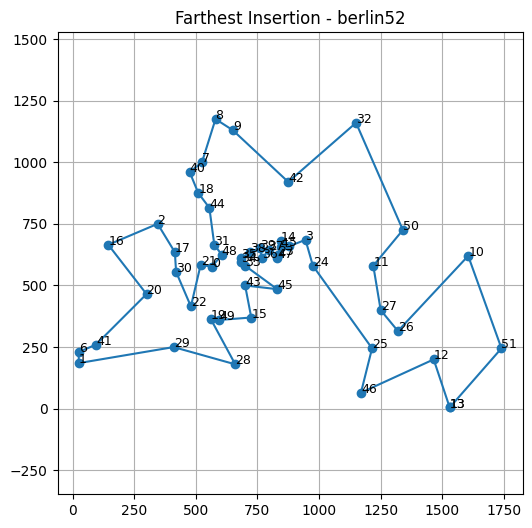

In [ ]:
# ========================== 数据集加载类 ==========================
class TSPLibDataset:
    def __init__(self, folder="/content/tsplib_instances"):
        self.folder = folder
        os.makedirs(folder, exist_ok=True)

    def load_instance(self, name: str):
        tsp_path = os.path.join(self.folder, f"{name}.tsp")
        if not os.path.exists(tsp_path):
            raise FileNotFoundError(f"{tsp_path} not found. Please ensure it exists in the folder.")
        problem = tsplib95.load(tsp_path)
        coords = [problem.node_coords[i + 1] for i in range(problem.dimension)]
        n = len(coords)
        distances = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                if i != j:
                    distances[i, j] = np.linalg.norm(np.array(coords[i]) - np.array(coords[j]))
        return {"name": name, "dimension": n, "distances": distances, "coords": coords}

    def load_instances(self, names: list[str]) -> dict:
        return {name: self.load_instance(name) for name in names}


# ========================== 构造算法类 ==========================
class BasicTSPAlgorithms:
    @staticmethod
    def nearest_insertion(distances):
        n = distances.shape[0]
        visited = [0]
        while len(visited) < n:
            unvisited = [i for i in range(n) if i not in visited]
            next_city = min(unvisited, key=lambda u: min(distances[u, v] for v in visited))
            insert_pos = BasicTSPAlgorithms._best_insertion_pos(visited, next_city, distances)
            visited.insert(insert_pos, next_city)
        return visited

    @staticmethod
    def cheapest_insertion(distances):
        n = distances.shape[0]
        visited = [0, 1]
        while len(visited) < n:
            unvisited = [i for i in range(n) if i not in visited]
            best_cost = float("inf")
            best_pos = (None, None)
            for u in unvisited:
                for i in range(len(visited)):
                    j = (i + 1) % len(visited)
                    a, b = visited[i], visited[j]
                    cost = distances[a, u] + distances[u, b] - distances[a, b]
                    if cost < best_cost:
                        best_cost = cost
                        best_pos = (u, j)
            visited.insert(best_pos[1], best_pos[0])
        return visited

    @staticmethod
    def farthest_insertion(distances):
        n = distances.shape[0]
        c0, c1 = np.unravel_index(np.argmax(distances), distances.shape)
        visited = [c0, c1]
        while len(visited) < n:
            unvisited = [i for i in range(n) if i not in visited]
            farthest = max(unvisited, key=lambda u: min(distances[u, v] for v in visited))
            best_cost = float("inf")
            best_pos = 0
            for i in range(len(visited)):
                j = (i + 1) % len(visited)
                a, b = visited[i], visited[j]
                cost = distances[a, farthest] + distances[farthest, b] - distances[a, b]
                if cost < best_cost:
                    best_cost = cost
                    best_pos = j
            visited.insert(best_pos, farthest)
        return visited

    @staticmethod
    def _best_insertion_pos(route, city, distances):
        best_cost = float("inf")
        best_pos = 0
        for i in range(len(route)):
            j = (i + 1) % len(route)
            a, b = route[i], route[j]
            cost = distances[a, city] + distances[city, b] - distances[a, b]
            if cost < best_cost:
                best_cost = cost
                best_pos = j
        return best_pos


# ========================== 评估与可视化函数 ==========================
def tsp_evaluate(route, distances):
    return sum(distances[route[i], route[i + 1]] for i in range(len(route) - 1)) + distances[route[-1], route[0]]


def evaluate(instances, solver_fn):
    result = {}
    for name, instance in instances.items():
        route = solver_fn(instance["distances"])
        length = tsp_evaluate(route, instance["distances"])
        result[name] = (length, route, instance["coords"])
    return result


def visualize_tsp_path(route, coords, title="TSP Path"):
    xs = [coords[i][0] for i in route + [route[0]]]
    ys = [coords[i][1] for i in route + [route[0]]]
    plt.figure(figsize=(6, 6))
    plt.plot(xs, ys, marker='o')
    for i, (x, y) in enumerate(zip(xs, ys)):
        plt.text(x, y, str(route[i % len(route)]), fontsize=9)
    plt.title(title)
    plt.grid(True)
    plt.axis("equal")
    plt.show()


# ========================== 主运行流程 ==========================
if __name__ == "__main__":
    dataset = TSPLibDataset(folder="/content/tsplib_instances")
    instances = dataset.load_instances(["berlin52", "eil76"])


    results_nearest = evaluate(instances, BasicTSPAlgorithms.nearest_insertion)
    results_cheapest = evaluate(instances, BasicTSPAlgorithms.cheapest_insertion)
    results_farthest = evaluate(instances, BasicTSPAlgorithms.farthest_insertion)

    # 显示评分表
    df = pd.DataFrame({
        "Instance": results_nearest.keys(),
        "Nearest Insertion": [round(results_nearest[k][0], 2) for k in results_nearest],
        "Cheapest Insertion": [round(results_cheapest[k][0], 2) for k in results_cheapest],
        "Farthest Insertion": [round(results_farthest[k][0], 2) for k in results_farthest],
    })
    print(df)

    # 可视化其中一个实例
    name = "berlin52"
    visualize_tsp_path(results_nearest[name][1], results_nearest[name][2], title="Nearest Insertion - berlin52")
    visualize_tsp_path(results_cheapest[name][1], results_cheapest[name][2], title="Cheapest Insertion - berlin52")
    visualize_tsp_path(results_farthest[name][1], results_farthest[name][2], title="Farthest Insertion - berlin52")

### Funsearch Style

In [ ]:
# ========== 数据加载器 + 构造 FunSearch 格式测试集 ==========
class TSPLibDataset:
    def __init__(self, folder="/content/tsplib_instances"):
        self.folder = folder
        os.makedirs(folder, exist_ok=True)

    def load_instance(self, name: str):
        tsp_path = os.path.join(self.folder, f"{name}.tsp")
        if not os.path.exists(tsp_path):
            raise FileNotFoundError(f"{tsp_path} not found. Please ensure it exists.")
        problem = tsplib95.load(tsp_path)
        coords = [problem.node_coords[i + 1] for i in range(problem.dimension)]
        n = len(coords)
        distances = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                if i != j:
                    distances[i, j] = np.linalg.norm(np.array(coords[i]) - np.array(coords[j]))
        return {"name": name, "dimension": n, "distances": distances, "coords": coords}

    def load_instances(self, names: list[str]) -> dict:
        return {name: self.load_instance(name) for name in names}


def build_funsearch_dataset(tsplib_data: dict) -> dict:
    """
    tsplib_data: {'berlin52': {'distances': ndarray, ...}, ...}
    返回值必须是 dict[name] -> {"distances": ndarray}
    """
    return {name: {"distances": data["distances"]} for name, data in tsplib_data.items()}


dataset = TSPLibDataset("/content/tsplib_instances")
tsplib_data = dataset.load_instances(["berlin52", "eil76"])
instances = build_funsearch_dataset(tsplib_data)

In [ ]:
# ========================== FunSearch 架构代码 ==========================
import os
import numpy as np
import tsplib95
import funsearch

# ========== 可进化的 tsp_priority 启发式函数 ==========
@funsearch.evolve
def tsp_priority(current_city: int, unvisited: list[int], distances: np.ndarray) -> int:
    # 初始策略：最近邻启发式
    priorities = -distances[current_city, unvisited]  # 越小越优
    return unvisited[np.argmax(priorities)]


# ========== 构造路径函数（使用 tsp_priority 构造完整路径） ==========
def tsp_solve(distances: np.ndarray, start_city: int = 0) -> list[int]:
    num_cities = distances.shape[0]
    visited = [start_city]
    current_city = start_city
    for _ in range(num_cities - 1):
        unvisited = [i for i in range(num_cities) if i not in visited]
        next_city = tsp_priority(current_city, unvisited, distances)
        visited.append(next_city)
        current_city = next_city
    return visited


# ========== 评估函数（FunSearch 的主评分函数） ==========
@funsearch.run
def evaluate(instances: dict) -> float:
    total_costs = []
    for name, instance in instances.items():
        distances = instance["distances"]
        route = tsp_solve(distances)
        cost = tsp_evaluate(route, distances)
        total_costs.append(cost)
    return -np.mean(total_costs)  # FunSearch 默认最大化目标，这里我们最小化路径成本


# ========== 计算路径总距离 ==========
def tsp_evaluate(route: list[int], distances: np.ndarray) -> float:
    return sum(distances[route[i], route[i + 1]] for i in range(len(route) - 1)) + distances[route[-1], route[0]]






evaluate(instances)
